In [2]:
import json
import pandas as pd
import numpy as np
from ete3 import Tree, faces, AttrFace, TreeStyle, NodeStyle, TextFace

In [3]:
tree_path = '../auspice/flu_seasonal_h3n2_ha_12y_hi_tree.json'
with open(tree_path, 'r') as tree_json:
    tree = json.load(tree_json)

In [37]:
df = pd.read_csv('../dataframes/h3n2_ha_12y_hi_egg.csv')
clade_muts = pd.read_csv('../results/kk_clades_h3n2_ha_12y_hi.csv')
tree = Tree('../results/tree_who_h3n2_ha_12y_concat_hi.nwk', format=1)

In [171]:
def add_mut_labels(label_branch, n):
    for k,v in clade_muts.iterrows():
        if v['kk_clade'] == label_branch:
            label_mut = TextFace(v['aa_muts'])
            n.add_face(label_mut, column=0, position = "aligned")

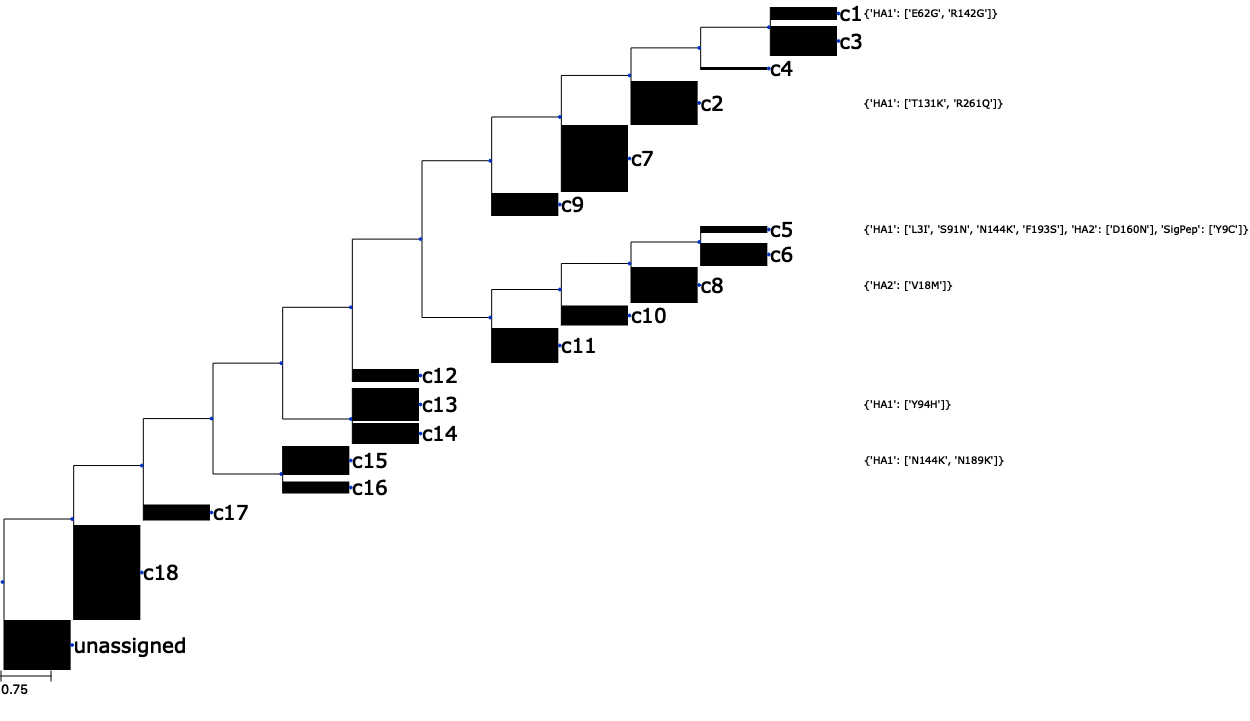

In [172]:
t = Tree("((((((((((((c1, c3), c4), c2), c7), c9), ((((c5,c6),c8), c10), c11)), c12), (c13, c14)), (c15, c16)), c17), c18), unassigned);")

branches_to_label = {'c1': t.get_leaves_by_name("c1")[0], 
                     'c2': t.get_leaves_by_name("c2")[0], 
                     'c3': t.get_common_ancestor("c1", "c3"), 
                     'c4': t.get_common_ancestor("c4", "c3"), 
                     'c5': t.get_leaves_by_name("c5")[0], 
                     'c6': t.get_common_ancestor("c5", "c6"), 
                     'c7': t.get_common_ancestor("c7", "c2"), 
                     'c8': t.get_leaves_by_name("c8")[0], 
                     'c9': t.get_common_ancestor("c9", "c7"), 
                     'c10': t.get_common_ancestor("c10", "c8"), 
                     'c11': t.get_common_ancestor("c11", "c10"), 
                     'c12': t.get_common_ancestor("c12", "c11"), 
                     'c13': t.get_leaves_by_name("c13")[0], 
                     'c14': t.get_common_ancestor("c14", "c12"), 
                     'c15': t.get_leaves_by_name("c15")[0], 
                     'c16': t.get_common_ancestor("c16", "c14"), 
                     'c17': t.get_common_ancestor("c17", "c16"), 
                     'c18': t.get_common_ancestor("c18", "c17")}

for clade, branch_to_label in branches_to_label.items():
    add_mut_labels(clade, branch_to_label)


def layout(node):
    if node.is_leaf():
        N = AttrFace("name", fsize=20)
        faces.add_face_to_node(N, node, 0)
        
for l in t.iter_leaves():  
    style = NodeStyle()
    style["hz_line_width"] = len(df[df['kk_clade']==l.name])
    style["hz_line_type"] = 0
    l.img_style = style
  

ts = TreeStyle()
ts.layout_fn = layout
# ts.scale =  80 
ts.show_leaf_name = False
ts.tree_width = 800
t.render("%%inline", tree_style = ts)



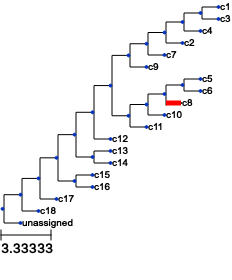

In [30]:
clade_counts_df = df.groupby('kk_clade').size().reset_index().rename(columns={0:'clade_size'})
clade_counts = clade_counts_df.set_index('kk_clade').T.to_dict('list')

style1 = NodeStyle()
style1["fgcolor"] = "#0f0f0f"
style1["size"] = 1
style1["vt_line_color"] = "#ff0000"
style1["hz_line_color"] = "#ff0000"
style1["vt_line_width"] = 2
style1["hz_line_width"] = 5
style1["vt_line_type"] = 0 # 0 solid, 1 dashed, 2 dotted
style1["hz_line_type"] = 0
for l in t.iter_leaves():
#     print(clade_counts[l.name])
    if l.name == 'c8':
        l.img_style = style1
t.render("%%inline")  